## Notebook to troubleshoot MCMC trace decoder

In [1]:
# import packages
import numpy as np
import time
from matplotlib import pyplot as plt
from init_mcmc_multi_state import init_mcmc
from trace_simulators import simulate_traces_poisson
from numpy import linalg as LA

### Define system parameters

In [2]:
# transition and emission arrays
A = np.array([[.95, .05, 0],
              [.05, .85,.3],
              [0,  .1, .7]])

lambda_vec = np.array([.05,1,2])

# basic trace parameters
memory = 7*10 # number of time steps for Pol II to teranscribe gene
dT = 20 # time resolution of experimental data
tau = 2 # minimum time scale of the system
cv_factor = int(dT/tau)
# Fix trace length for now
trace_len = 500 # length of simulated trace (time steps)
# Number of traces per batch
sigma = 20 # stdev of Gaussian noise
auPolII = 20 
alpha = 14
# set priors
a_prior = np.ones((3, 3))
lambda_prior = np.ones((2, 3))
pi0_prior = np.ones((3))

### Simulate trace

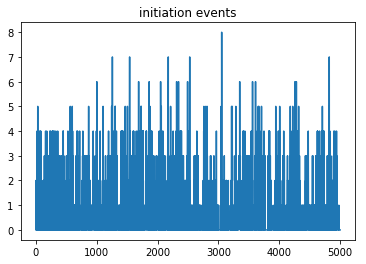

In [3]:
#fluo_noise, fluo_raw, fluo_unif, system_states, initiation_states \
#    = simulate_traces(tau, dT, memory, trace_len, A, e, r, sigma, alpha)

fluo_noise, fluo_raw, fluo_unif, system_states, initiation_states = \
simulate_traces_poisson(tau,dT,memory,trace_len,A,lambda_vec,auPolII,sigma,alpha)

fig2, ax2 = plt.subplots()
ax2.set_title("initiation events")
ax2.plot(initiation_states)

## Call fitting function

In [4]:
n_steps = 50
start = time.time()
logL_vec, lambda_array, a_array_stack, pi0_array = \
   init_mcmc([initiation_states], a_prior, lambda_prior, pi0_prior, n_steps=n_steps, burn_in=1)
print(time.time()-start)

98.89701676368713


## Track trends in learning (or lack thereof)

Text(0.5, 0, 'iteration')

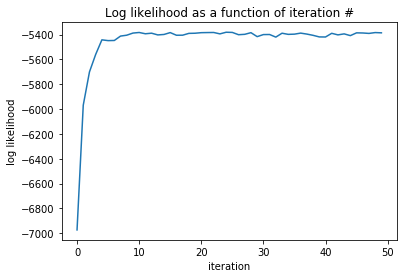

In [5]:
fig1, ax1 = plt.subplots()
ax1.plot(logL_vec)
ax1.set_title("Log likelihood as a function of iteration #")
ax1.set_ylabel("log likelihood")
ax1.set_xlabel("iteration")

(3, 3, 50)


(array([1., 2., 7., 3., 4., 5., 3., 0., 4., 1.]),
 array([1.67820662, 1.70643212, 1.73465762, 1.76288312, 1.79110862,
        1.81933412, 1.84755963, 1.87578513, 1.90401063, 1.93223613,
        1.96046163]),
 <a list of 10 Patch objects>)

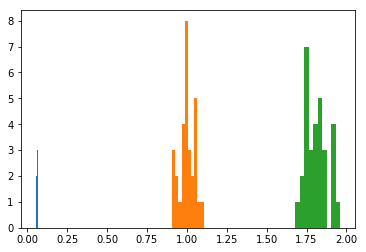

In [6]:
burn_in = 20
lambda_mean = np.mean(lambda_array[:, burn_in:],axis=1)
li = np.argsort(lambda_mean)
# re-order
print(np.shape(a_array_stack))
p0_vec = lambda_array[li[0], burn_in:]
p1_vec = lambda_array[li[1], burn_in:]
p2_vec = lambda_array[li[2], burn_in:]


plt.hist(p0_vec)
plt.hist(p1_vec)
plt.hist(p2_vec)

(array([2., 2., 7., 2., 3., 5., 3., 4., 1., 1.]),
 array([0.72488513, 0.74484499, 0.76480485, 0.78476472, 0.80472458,
        0.82468444, 0.8446443 , 0.86460417, 0.88456403, 0.90452389,
        0.92448376]),
 <a list of 10 Patch objects>)

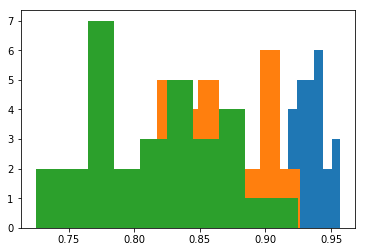

In [7]:
a0_vec = a_array_stack[li[0],li[0],burn_in:]
a1_vec = a_array_stack[li[1],li[1],burn_in:]
a2_vec = a_array_stack[li[2],li[2],burn_in:]

plt.hist(a0_vec)
plt.hist(a1_vec)
plt.hist(a2_vec)


In [8]:
a = a_array_stack[:,:,-20]
print(a)

[[0.81797454 0.05066138 0.0102948 ]
 [0.07564622 0.90952095 0.05337361]
 [0.10637923 0.03981767 0.9363316 ]]


In [9]:
print(pi0_array[:,-1])

[0.53593898 0.20466998 0.25939104]
